# Group Proposal.


## Title: The Future of the Heart
### Introduction:

Many say the heart is the main part of our body, and that is generally true! Our heart performs the difficult task of pumping blood to the whole body and consequently making sure the body has all it needs to function properly. Sadly, the heart is also not perfect and can be negatively impacted in a bunch of different ways, causing heart diseases. Some of them are diabetes, hypertension, high cholesterol and many others.
So, the aim of this project is based on different types of clinical measurements (heart-related), to predict if someone has a heart disease. To do that, our group is going to be using classification and the KNN algorithm to answer: “Based on heart-related clinical measurements, does this person have heart disease?”.
For this, we are going to be using a Heart Disease data set, collected by the University of California Irvine, which contains data regarding blood pressure, cholesterol levels, sugar levels in the blood and many more. All this data was collected from 4 different regions around the world, being them: Cleveland (USA), Hungary, Switzerland, and California.

We expect to create an effective classification algorithm, in a way that based on simple blood measurements, can predict if someone has a heart disease. If we manage to accomplish this, this algorithm could have a great impact in the health industry, helping doctors, nurses and professionals from this area to have accurate diagnoses more quickly, and therefore decreasing waiting times for exam results interpretations. And in the future, this could lead to more algorithms following this same idea, but for more areas within the health industry, for example, gastrointestinal diseases.


### Methods & Results:

In the code below, we read all the data from the database into R, using the `read_csv` function. Importing the databases from the UCI Irvine database. There are four regions from which the data is sampled. Also, we renamed the columns of the data frames to their respective titles, so that they are human-readable.


In [26]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)


In [27]:
cleveland_data <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"))
colnames(cleveland_data)<-
             c("age","sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
hungarian_data <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"))
colnames(hungarian_data)<-
             c("age","sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
switzerland_data <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"))
colnames(switzerland_data)<-
             c("age","sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
va_data <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"))
colnames(va_data)<-
             c("age","sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
cleveland_data
hungarian_data
switzerland_data
va_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `2` -> `2...3`
• `0` -> `0...6`
• `2` -> `2...7`
• `0` -> `0...9`
• `0` -> `0...10`
• `?` -> `?...11`
• `?` -> `?...12`
• `?` -> `?...13`
• `0` -> `0...14`
Rows: 293 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): 130, 132, 0...6, 2...7, 185, 0...9, ?...11, ?...12, ?...13
dbl (5): 28, 1, 2...3, 0...10, 0...14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
34,1,4,115,0,?,?,154,0,.2,1,?,?,1
35,1,4,?,0,?,0,130,1,?,?,?,7,3
36,1,4,110,0,?,0,125,1,1,2,?,6,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
73,0,3,160,0,0,1,121,0,0,1,?,3,1
74,1,2,145,0,?,1,123,0,1.3,1,?,?,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
44,1,4,130,209,0,1,127,0,0,?,?,?,0
60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,?,?,6,2
58,1,4,?,385,1,2,?,?,?,?,?,?,0
62,1,2,120,254,0,2,93,1,0,?,?,?,1


Then we used the `mutate` function to create a new column in the four different tables, called `region`, to simplify the process of merging then all together.  We include the names of the respective regions so we can identify each region when combined.

In [28]:
cleveland_data <- mutate(cleveland_data, region = "Cleveland")
hungarian_data <- mutate(hungarian_data, region = "Hungary")
switzerland_data <- mutate(switzerland_data, region = "Switzerland")
va_data <- mutate(va_data, region = "VA Long Beach")
cleveland_data
hungarian_data
switzerland_data
va_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Cleveland
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,Cleveland
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,Cleveland
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0,Cleveland


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
29,1,2,120,243,0,0,160,0,0,?,?,?,0,Hungary
29,1,2,140,?,0,0,170,0,0,?,?,?,0,Hungary
30,0,1,170,237,0,1,170,0,0,?,?,6,0,Hungary
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1,Hungary
58,0,2,180,393,0,0,110,1,1,2,?,7,1,Hungary
65,1,4,130,275,0,1,115,1,1,2,?,?,1,Hungary


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
34,1,4,115,0,?,?,154,0,.2,1,?,?,1,Switzerland
35,1,4,?,0,?,0,130,1,?,?,?,7,3,Switzerland
36,1,4,110,0,?,0,125,1,1,2,?,6,1,Switzerland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,?,2,114,0,1.6,2,2,?,0,Switzerland
73,0,3,160,0,0,1,121,0,0,1,?,3,1,Switzerland
74,1,2,145,0,?,1,123,0,1.3,1,?,?,1,Switzerland


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
44,1,4,130,209,0,1,127,0,0,?,?,?,0,VA Long Beach
60,1,4,132,218,0,1,140,1,1.5,3,?,?,2,VA Long Beach
55,1,4,142,228,0,1,149,1,2.5,1,?,?,1,VA Long Beach
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,?,?,6,2,VA Long Beach
58,1,4,?,385,1,2,?,?,?,?,?,?,0,VA Long Beach
62,1,2,120,254,0,2,93,1,0,?,?,?,1,VA Long Beach


With the help of the `rbind` function we merged all the data in one data set, so we are able to wrangle more the data and make it tidy. 

In [29]:
final_df <- rbind(cleveland_data, hungarian_data, switzerland_data, va_data)
final_df


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Cleveland
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,?,?,6,2,VA Long Beach
58,1,4,?,385,1,2,?,?,?,?,?,?,0,VA Long Beach
62,1,2,120,254,0,2,93,1,0,?,?,?,1,VA Long Beach


Finally we removed all the NA values - in this case `?` - using the `filter` function, resulting in the table `final_df1`, which contains all the data that we need.

In [30]:
final_df1 <- filter(final_df, trestbps != "?" & chol != "?" & fbs != "?" & restecg != "?" & thalach != "?" & exang != "?" & oldpeak != "?" & slope != "?" & ca != "?" & thal != "?")
final_df1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Cleveland
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,0,2,130,236,0,2,174,0,0,2,1.0,3.0,1,Cleveland
47,1,4,150,226,0,0,98,1,1.5,2,0,7,1,Hungary
56,1,4,120,100,0,0,120,1,1.5,2,0,7,1,VA Long Beach


In this part, we used the `mutate` function to create a new column, which we named `narrowing`, and will indicate when the individual has more/less than 50% diameter of blood vessel narrowing. Therefore we re-classified the variables in the data frame to allow for wrangling and classification.

In [31]:
final_df2 <- final_df1 |>
             mutate(narrowing = case_when(num < 1 ~ "< 50% diameter narrowing", num >= 1 ~ "> 50% diameter narrowing")) |>
             mutate(narrowing = as_factor(narrowing), cp = as.numeric(cp), trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as.numeric(fbs), thalach = as.numeric(thalach)) |> 
             mutate(restecg = as.numeric(restecg), exang = as.numeric(exang), oldpeak = as.numeric(oldpeak), slope = as.numeric(slope), ca = as.numeric(ca), thal = as.numeric(thal)) |>
             select(-num)
final_df2

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,region,narrowing
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
67,1,4,160,286,0,2,108,1,1.5,2,3,3,Cleveland,> 50% diameter narrowing
67,1,4,120,229,0,2,129,1,2.6,2,2,7,Cleveland,> 50% diameter narrowing
37,1,3,130,250,0,0,187,0,3.5,3,0,3,Cleveland,< 50% diameter narrowing
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,0,2,130,236,0,2,174,0,0.0,2,1,3,Cleveland,> 50% diameter narrowing
47,1,4,150,226,0,0,98,1,1.5,2,0,7,Hungary,> 50% diameter narrowing
56,1,4,120,100,0,0,120,1,1.5,2,0,7,VA Long Beach,> 50% diameter narrowing


Lastly, for a first visulization, we created plot using `ggplot` to contrast the variables `age` and `narrowing` and tried to notice if there is any kind of trend.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


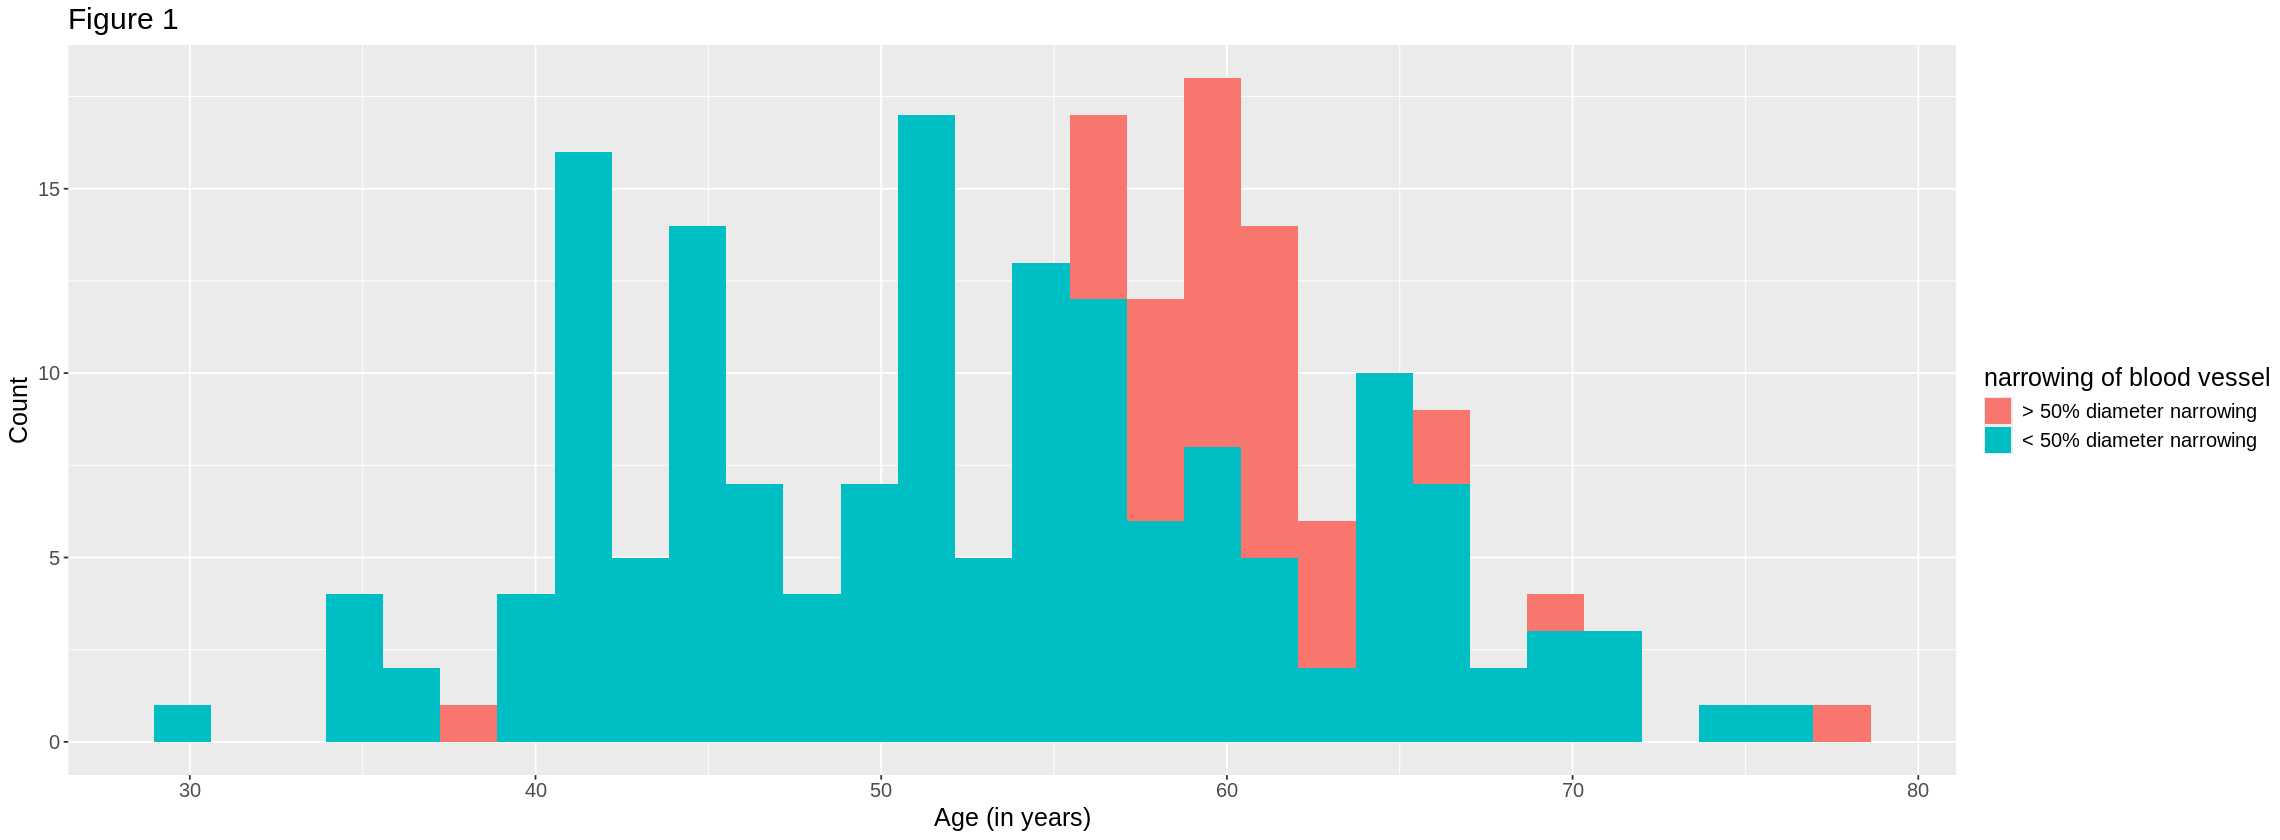

In [61]:
options(repr.plot.width = 9, repr.plot.height = 7)
plot <- ggplot(final_df2, aes(x = age, fill = narrowing)) +
        geom_histogram(position = "identity") +
        labs(x = "Age (in years)", y = "Count", fill = "narrowing of blood vessel", title = "Figure 1") +
        theme(text = element_text(size = 15))
# ("A visualization of age when contrasted to the main predictor of presence (or not) of heart-related disease")
# include this as label (somehow)     
plot

Now, to start with the classification process we first set a seed, so that all of our results can be reproducible, and proceed to make a split of the data, using a proportion of 75% to 25%, where we train the data in 75% of it, and test it on the other 25% (that's is also the reason why we use the `training` and `testing` functions).

After this, we need to find the optimal K neighbours value, so we first set the `k_spec` which is our nearest neighbour algorithm, and also set the `recipe`, using all predictors available on the data set, with exception to the `region`. 
Then, we create a `vfold` to apply the cross-validation process, which is a way to have more reliable results by splitting the data into different sections, and using all of them to perform the analysis.


In [47]:
# WE are going to split the data into training and testing
set.seed(0000)

split_data <- initial_split(final_df2, prop = 0.75, strata = narrowing)
training_data <- training(split_data)
testing_data <- testing(split_data)

# Finding the optimum K neighbor

k_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
          set_engine("kknn") |>
          set_mode("classification")

recipe <- recipe(narrowing ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach	+ exang	+ oldpeak + slope + ca + thal, data = training_data) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors())

# create a vfold to apply cross validation
training_vfold <- vfold_cv(training_data, v = 5, strata = narrowing)

gridval <- tibble(neighbors = seq(from = 1, to = 178, by = 1))



Now, we create the `workflow`, using the components from the last section, aiming in the most optimal K value for this data set. After extracting the metrics from the the workflow, we use this data (`knn_results`) to plot all K neighboors tested, contrasting with their respective accuracies. And not only through the graph, but also using the `arrange` function we are able to notice that the best K for this data is `K = 41`.

→ A | warning: 178 samples were requested but there were 178 rows in the data. 173 will be used.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x3

There were issues with some computations   A: x4

→ B | warning: 178 samples were requested but there were 180 rows in the data. 175 will be used.

There were issues with some computations   A: x4
There were issues with some computations   A: x4   B: x1

There were issues with some computations   A: x4   B: x1





[1] 33

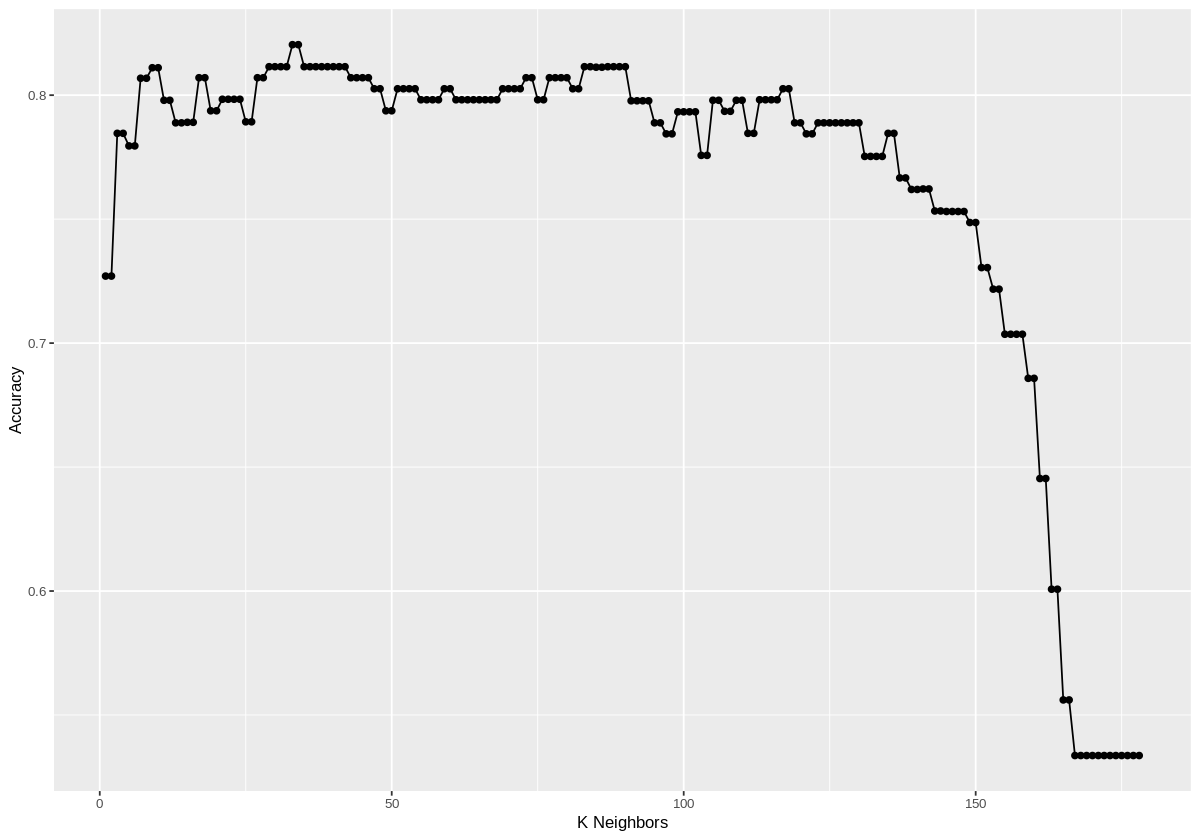

In [34]:
# create a workflow and extract the metrics from it's classification to figure out the optimum K
knn_results <- workflow() |>
         add_recipe(recipe) |>
         add_model(k_spec) |>
         tune_grid(resamples = training_vfold, grid = gridval) |>
         collect_metrics() |>
         filter(.metric == "accuracy")


# create a plot to visualize k-neighbors versus it's respective accuracy.
knn_results_plot <- ggplot(knn_results, aes(x = neighbors, y = mean)) +
              geom_point() +
              geom_line() +
              labs(x = "K Neighbors", y = "Accuracy") +
              theme(text = element_text(size = 10))
knn_results_plot

# single out the best K neighboor
best_k <- knn_results |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)

best_k


Lastly, now with the best K value in mind, we can complete the classification itself. By creating the `k_spec2` using the ` K = 41 `, we implement it into a new `workflow`, and this apply the algorithm to the training data.

After the data is already trained, we can use the `k_fit` to predict the `testing_data`.

Finally, we collect the metrics of the `k_prediction` data set (which includes the predictions from the testing data) and using the functions `metrics` and `filter`, we narrow the `k_results` to exclusively the accuracy of the whole process, which turned out to be 92%!

In [59]:


# we found the optimum k and we will re-train the data and then use it on the test data.

k_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 41) |>
           set_engine("kknn") |>
           set_mode("classification")

k_fit <- workflow() |>
          add_recipe(recipe) |>
          add_model(k_spec2) |>
          fit(data = training_data)

# predict on the test data.
k_prediction <- predict(k_fit, testing_data) |>
             bind_cols(testing_data) 

# extract the results from our classification attempt.
k_results <- metrics(k_prediction, truth = narrowing, estimate = .pred_class) |>
            filter(.metric == "accuracy")

k_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.92


### Discussion:

92% accuracy!!!


### References: 

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.